In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [3]:
from tensorflow.keras.datasets import cifar10

In [4]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170508288/170498071 [==============================] - 2s 0us/step


In [17]:
single_image = X_train[100]
single_image.shape

(32, 32, 3)

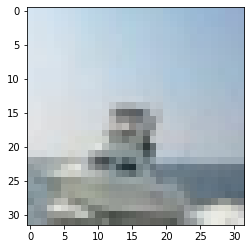

In [18]:
plt.imshow(single_image)

In [19]:
from tensorflow.keras.utils import to_categorical

In [20]:
# ONE HOT ENCODING THE LABELS
# THE NETWORK CAN NOW KNOW THAT IT IS A CLASSIFICATION PROBLEM
y_cat_train = to_categorical(y_train)
y_cat_test = to_categorical(y_test)

In [21]:
# NORMALIZING IMAGES
X_train = X_train/255
X_test = X_test/255

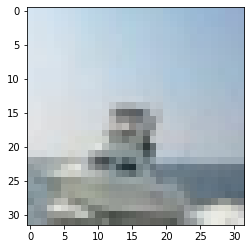

In [22]:
scaled_image = X_train[100]
plt.imshow(scaled_image)

In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [24]:
model = Sequential()

model.add(Conv2D(input_shape = (32,32,3),filters=32, kernel_size=(4,4), activation="relu")) # Initial conv layer
model.add(MaxPool2D(pool_size=(2,2))) # Pooling layer as half of the kernel size
model.add(Conv2D(input_shape = (32,32,3),filters=32, kernel_size=(4,4), activation="relu")) # hidden conv layer
model.add(MaxPool2D(pool_size=(2,2))) # Hidden Pooling layer as half of the kernel size

model.add(Flatten()) # Flatten the image to 1D array of widthxheight size

model.add(Dense(256, activation="relu")) # Dense layer

# OUTPUT LAYER SOFTMAX -> MULTI CLASSIFICATION
model.add(Dense(10, activation="softmax")) # Output layer - 10 is the number of classes

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [25]:
from tensorflow.keras.callbacks import EarlyStopping

In [27]:
early_stop = EarlyStopping(monitor="val_loss", patience=2)

In [31]:
model.fit(X_train, y_cat_train, epochs=15,validation_data=(X_test, y_cat_test), callbacks=[early_stop])

Epoch 1/15
1563/1563 [==============================] - 77s 49ms/step - loss: 0.9747 - accuracy: 0.6581 - val_loss: 1.2552 - val_accuracy: 0.5858
Epoch 2/15
1563/1563 [==============================] - 71s 45ms/step - loss: 0.8709 - accuracy: 0.6960 - val_loss: 1.2559 - val_accuracy: 0.5959
Epoch 3/15
1563/1563 [==============================] - 78s 50ms/step - loss: 0.8092 - accuracy: 0.7163 - val_loss: 1.2590 - val_accuracy: 0.5947


In [32]:
metrics = pd.DataFrame(model.history.history)

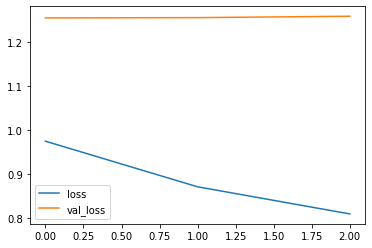

In [33]:
metrics[["loss", "val_loss"]].plot()

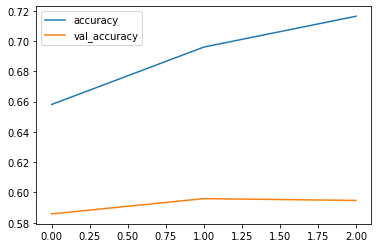

In [34]:
metrics[["accuracy", "val_accuracy"]].plot()

In [35]:
model.evaluate(X_test, y_cat_test, verbose=0)

[1.2590274810791016, 0.5946999788284302]

In [36]:

from sklearn.metrics import classification_report, confusion_matrix

In [37]:
predictions = np.argmax(model.predict(X_test), axis=-1)

In [38]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.66      0.58      0.62      1000
           1       0.74      0.69      0.72      1000
           2       0.54      0.45      0.49      1000
           3       0.43      0.39      0.41      1000
           4       0.49      0.56      0.52      1000
           5       0.50      0.51      0.50      1000
           6       0.64      0.71      0.67      1000
           7       0.65      0.67      0.66      1000
           8       0.69      0.69      0.69      1000
           9       0.61      0.70      0.65      1000

    accuracy                           0.59     10000
   macro avg       0.59      0.59      0.59     10000
weighted avg       0.59      0.59      0.59     10000



In [39]:
import seaborn as sns

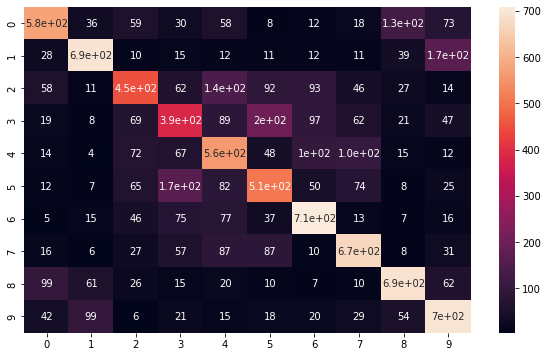

In [40]:
plt.figure(figsize=(10,6))
sns.heatmap(confusion_matrix(y_test, predictions), annot=True)

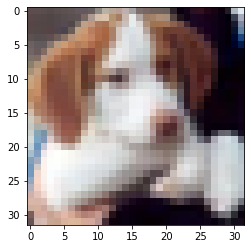

In [49]:
number = X_test[16]
plt.imshow(number)

In [50]:
np.argmax(model.predict(number.reshape(1, 32, 32, 3)), axis=-1) # the output is an integer beacuse of the softmax activation

array([5])